In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_ism = pd.read_excel('/content/sample_data/ism.xlsx')
df_ism

,ISM Release Date,ISM Actual Reported,ISM Median Forecast
0,1998-02-02,52.4,52.8
1,1998-03-02,53.3,52.5
2,1998-04-01,54.8,53.0
3,1998-05-01,52.9,54.0
4,1998-06-01,51.4,52.3
...,...,...,...
286,2021-12-01,61.1,61.0
287,2022-01-04,58.7,60.0
288,2022-02-01,57.6,57.5
289,2022-03-01,58.6,58.0


In [3]:
df_ism.info()
df_ism.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ISM Release Date     291 non-null    datetime64[ns]
 1   ISM Actual Reported  291 non-null    float64       
 2   ISM Median Forecast  289 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 6.9 KB


ISM Release Date       0
ISM Actual Reported    0
ISM Median Forecast    2
dtype: int64

That means **ISM Median Forecast** has na values so we need to handle this. I choose to handle with interpolation.

> Indented block



In [4]:
df_ism['ISM Median Forecast'] = df_ism['ISM Median Forecast'].interpolate()
df_ism.isna().sum()

ISM Release Date       0
ISM Actual Reported    0
ISM Median Forecast    0
dtype: int64

In [5]:
df_equity = pd.read_excel('/content/sample_data/assets.xlsx')
df_equity

,Date,US Equity Index
0,1995-12-29,792.04
1,1996-01-01,792.04
2,1996-01-02,798.22
3,1996-01-03,799.12
4,1996-01-04,794.47
...,...,...
6859,2022-04-14,9242.58
6860,2022-04-15,9242.58
6861,2022-04-18,9240.69
6862,2022-04-19,9389.21


In [6]:
df_equity.info()
df_equity.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6864 entries, 0 to 6863
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             6864 non-null   datetime64[ns]
 1   US Equity Index  6864 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 107.4 KB


Date               0
US Equity Index    0
dtype: int64

# Question 1

## Data Preparation

In [7]:
# Create binary values based on Jill's and Jack condition
# Create a variable for the difference compared to the previous month
df_ism['ISM_Difference_PrevMonth'] = df_ism['ISM Actual Reported'].diff()

# Create a variable for the difference compared to the median
df_ism['ISM_Difference_Median'] = df_ism['ISM Actual Reported'] - df_ism['ISM Median Forecast']

df_ism['Jack_Condition'] = (df_ism['ISM Actual Reported'].diff() > 0).astype(int)
df_ism['Jill_Condition'] = (df_ism['ISM Actual Reported'] > df_ism['ISM Median Forecast']).astype(int)

df_ism.head(30)

,ISM Release Date,ISM Actual Reported,ISM Median Forecast,ISM_Difference_PrevMonth,ISM_Difference_Median,Jack_Condition,Jill_Condition
0,1998-02-02,52.4,52.8,NaN,-0.4,0,0
1,1998-03-02,53.3,52.5,0.9,0.8,1,1
2,1998-04-01,54.8,53.0,1.5,1.8,1,1
3,1998-05-01,52.9,54.0,-1.9,-1.1,0,0
4,1998-06-01,51.4,52.3,-1.5,-0.9,0,0
5,1998-07-01,49.6,51.0,-1.8,-1.4,0,0
6,1998-08-03,49.1,49.8,-0.5,-0.7,0,0
7,1998-09-01,49.4,50.5,0.3,-1.1,1,0
8,1998-10-01,49.4,49.3,0.0,0.1,0,1
9,1998-11-02,48.3,49.0,-1.1,-0.7,0,0


In [8]:
# Drop rows where 'ISM_Difference' is NaN
# which is the first row (since the first row doesn't have previous ism actual reported data)
df_ism = df_ism.dropna(subset=['ISM_Difference_PrevMonth'])
df_ism

,ISM Release Date,ISM Actual Reported,ISM Median Forecast,ISM_Difference_PrevMonth,ISM_Difference_Median,Jack_Condition,Jill_Condition
1,1998-03-02,53.3,52.5,0.9,0.8,1,1
2,1998-04-01,54.8,53.0,1.5,1.8,1,1
3,1998-05-01,52.9,54.0,-1.9,-1.1,0,0
4,1998-06-01,51.4,52.3,-1.5,-0.9,0,0
5,1998-07-01,49.6,51.0,-1.8,-1.4,0,0
...,...,...,...,...,...,...,...
286,2021-12-01,61.1,61.0,0.3,0.1,1,1
287,2022-01-04,58.7,60.0,-2.4,-1.3,0,0
288,2022-02-01,57.6,57.5,-1.1,0.1,0,1
289,2022-03-01,58.6,58.0,1.0,0.6,1,1


In [9]:
# Calculate the return for each row within the specified time period
df_equity['Return_Y (%)'] = df_equity['US Equity Index'].pct_change()*100

df_equity.head(30)

,Date,US Equity Index,Return_Y (%)
0,1995-12-29,792.04,NaN
1,1996-01-01,792.04,0.000000
2,1996-01-02,798.22,0.780264
3,1996-01-03,799.12,0.112751
4,1996-01-04,794.47,-0.581890
5,1996-01-05,793.20,-0.159855
6,1996-01-08,795.68,0.312658
7,1996-01-09,784.16,-1.447818
8,1996-01-10,770.11,-1.791726
9,1996-01-11,775.56,0.707691


In [10]:
def calculate_total_return_by_ism_pairs(row, df_equity):
    start_date = row['ISM Release Date']
    end_date = df_ism.loc[row.name + 1, 'ISM Release Date'] if row.name < len(df_ism) - 1 else df_equity['Date'].max()

    # Filter df_equity for the specified date range
    selected_dates_df = df_equity[(df_equity['Date'] >= start_date) & (df_equity['Date'] <= end_date)]

    # Calculate the total return for the period
    total_return = (1 + selected_dates_df['Return_Y (%)'] / 100).prod() - 1

    return total_return

# Apply the function to each row in df_ism and create a new column 'Total_Return_Monthly'
df_ism['Total_Return_Monthly'] = df_ism.apply(calculate_total_return_by_ism_pairs, df_equity=df_equity, axis=1)

# Adjust the total return to be NaN for the last row since it doesn't have a corresponding end date
df_ism.loc[len(df_ism) - 1, 'Total_Return_Monthly'] = np.nan

# Print df_ism with the new column
df_ism

<ipython-input-10-81e0d31762d7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ism['Total_Return_Monthly'] = df_ism.apply(calculate_total_return_by_ism_pairs, df_equity=df_equity, axis=1)


,ISM Release Date,ISM Actual Reported,ISM Median Forecast,ISM_Difference_PrevMonth,ISM_Difference_Median,Jack_Condition,Jill_Condition,Total_Return_Monthly
1,1998-03-02,53.3,52.5,0.9,0.8,1,1,0.057390
2,1998-04-01,54.8,53.0,1.5,1.8,1,1,0.018466
3,1998-05-01,52.9,54.0,-1.9,-1.1,0,0,-0.017011
4,1998-06-01,51.4,52.3,-1.5,-0.9,0,0,0.054166
5,1998-07-01,49.6,51.0,-1.8,-1.4,0,0,-0.017882
...,...,...,...,...,...,...,...,...
286,2021-12-01,61.1,61.0,0.3,0.1,1,1,0.050890
287,2022-01-04,58.7,60.0,-2.4,-1.3,0,0,-0.051287
288,2022-02-01,57.6,57.5,-1.1,0.1,0,1,-0.044926
289,2022-03-01,58.6,58.0,1.0,0.6,1,1,NaN


In [11]:
df_ism = df_ism.dropna(subset=['Total_Return_Monthly'])
df_ism

,ISM Release Date,ISM Actual Reported,ISM Median Forecast,ISM_Difference_PrevMonth,ISM_Difference_Median,Jack_Condition,Jill_Condition,Total_Return_Monthly
1,1998-03-02,53.3,52.5,0.9,0.8,1,1,0.057390
2,1998-04-01,54.8,53.0,1.5,1.8,1,1,0.018466
3,1998-05-01,52.9,54.0,-1.9,-1.1,0,0,-0.017011
4,1998-06-01,51.4,52.3,-1.5,-0.9,0,0,0.054166
5,1998-07-01,49.6,51.0,-1.8,-1.4,0,0,-0.017882
...,...,...,...,...,...,...,...,...
285,2021-11-01,60.8,60.5,-0.3,0.3,0,1,-0.018578
286,2021-12-01,61.1,61.0,0.3,0.1,1,1,0.050890
287,2022-01-04,58.7,60.0,-2.4,-1.3,0,0,-0.051287
288,2022-02-01,57.6,57.5,-1.1,0.1,0,1,-0.044926


In [12]:
df_ism[['ISM Release Date', 'ISM Actual Reported', 'ISM Median Forecast',
        'Jack_Condition', 'Jill_Condition', 'Total_Return_Monthly']]

,ISM Release Date,ISM Actual Reported,ISM Median Forecast,Jack_Condition,Jill_Condition,Total_Return_Monthly
1,1998-03-02,53.3,52.5,1,1,0.057390
2,1998-04-01,54.8,53.0,1,1,0.018466
3,1998-05-01,52.9,54.0,0,0,-0.017011
4,1998-06-01,51.4,52.3,0,0,0.054166
5,1998-07-01,49.6,51.0,0,0,-0.017882
...,...,...,...,...,...,...
285,2021-11-01,60.8,60.5,0,1,-0.018578
286,2021-12-01,61.1,61.0,1,1,0.050890
287,2022-01-04,58.7,60.0,0,0,-0.051287
288,2022-02-01,57.6,57.5,0,1,-0.044926


## Validate Jack's claim




In [13]:
from scipy import stats

# Extract the Total_Return_Monthly values where Jack_Condition is 1
jack_condition_1_returns = df_ism.loc[df_ism['Jack_Condition'] == 1, 'Total_Return_Monthly']

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(jack_condition_1_returns, 0)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Compare p-value to alpha to make a decision
if p_value < alpha:
    print("Reject the null hypothesis. There is significant evidence that E(Y | X = 1) > 0.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest E(Y | X = 1) > 0.")


T-statistic: 3.6727139625731193
P-value: 0.000343987857564231
Reject the null hypothesis. There is significant evidence that E(Y | X = 1) > 0.


## Validate Jill's claim

In [14]:
# Extract the Total_Return_Monthly values where Jill_Condition is 1
jill_condition_1_returns = df_ism.loc[df_ism['Jill_Condition'] == 1, 'Total_Return_Monthly']

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(jill_condition_1_returns, 0)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Compare p-value to alpha to make a decision
if p_value < alpha:
    print("Reject the null hypothesis. There is significant evidence that E(Y | X = 1) > 0.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest E(Y | X = 1) > 0.")

T-statistic: 3.75331734977844
P-value: 0.0002518296981851177
Reject the null hypothesis. There is significant evidence that E(Y | X = 1) > 0.


# Question 2:

## Correlation Analysis

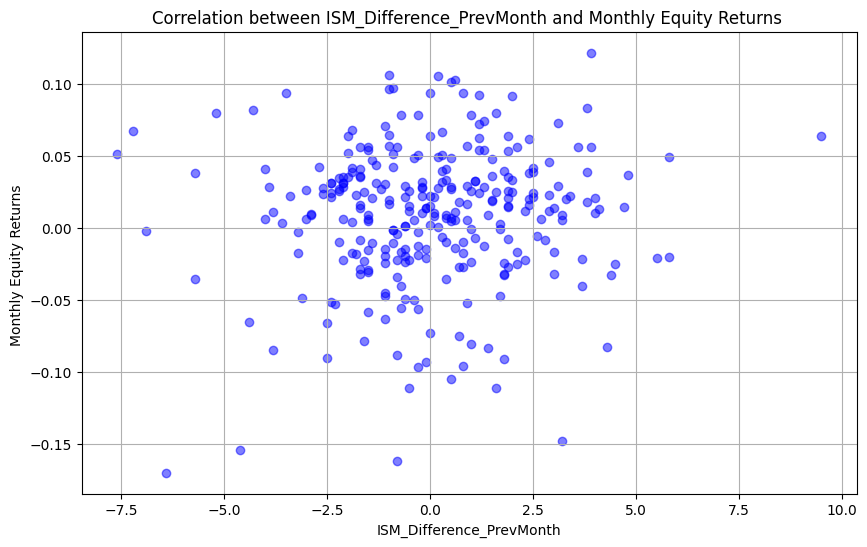

Correlation Coefficient: 0.07662474774790343


In [15]:
correlation = df_ism['ISM_Difference_PrevMonth'].corr(df_ism['Total_Return_Monthly'])
correlation
# Plot the relationship between ISM change and equity returns change
plt.figure(figsize=(10, 6))
plt.scatter(df_ism['ISM_Difference_PrevMonth'], df_ism['Total_Return_Monthly'], color='blue', alpha=0.5)
plt.title('Correlation between ISM_Difference_PrevMonth and Monthly Equity Returns ')
plt.xlabel('ISM_Difference_PrevMonth')
plt.ylabel('Monthly Equity Returns ')
plt.grid(True)
plt.show()

print(f"Correlation Coefficient: {correlation}")

A correlation coefficient of 0.0766 indicates a weak positive correlation between the change in ISM data from the previous month and monthly equity returns. This means that there is a slight tendency for equity returns to increase when ISM data improves from the previous month, but the relationship is not very strong.

## Threshold Effects

<ipython-input-16-38a31dc2cd3d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ism['ISM_Category'] = df_ism['ISM Actual Reported'].apply(categorize_ism, thresholds=thresholds)


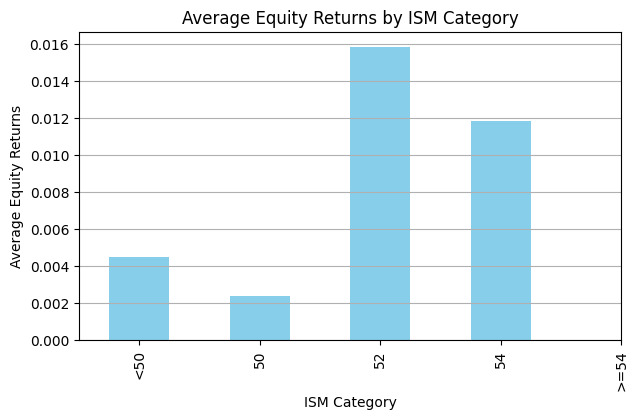

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Define threshold levels
thresholds = [50, 52, 54]  # Example threshold levels for ISM data

# Function to categorize ISM data based on threshold levels
def categorize_ism(ism_value, thresholds):
    for i, threshold in enumerate(thresholds):
        if ism_value < threshold:
            return i
    return len(thresholds)

# Apply the function to create a new column for ISM categories
df_ism['ISM_Category'] = df_ism['ISM Actual Reported'].apply(categorize_ism, thresholds=thresholds)

# Group by ISM categories and calculate average equity returns for each group
equity_returns_by_category = df_ism.groupby('ISM_Category')['Total_Return_Monthly'].mean()

# Visualize the relationship between ISM categories and equity returns
plt.figure(figsize=(7, 4))
equity_returns_by_category.plot(kind='bar', color='skyblue')
plt.title('Average Equity Returns by ISM Category')
plt.xlabel('ISM Category')
plt.ylabel('Average Equity Returns')
plt.xticks(range(len(thresholds) + 2), ['<50'] + [f'{threshold}' for threshold in thresholds] + ['>=54'])
plt.grid(axis='y')
plt.show()



In [17]:
# Print the average equity returns by ISM category
print("Average Equity Returns by ISM Category:")
for category, returns in equity_returns_by_category.items():
    if category == 0:
        print(f"<{thresholds[0]}: {returns}")
    elif category == len(thresholds):
        print(f">={thresholds[-1]}: {returns}")
    else:
        print(f"{thresholds[category - 1]}-{thresholds[category]}: {returns}")


Average Equity Returns by ISM Category:
<50: 0.004477203741570059
50-52: 0.0023806621891075204
52-54: 0.01584214419099869
>=54: 0.011851368742731634


Equity returns are highest when the ISM value is in the range of 52-54, with an average return of 1.58%.
Returns are also positive but lower when the ISM value is above 54, with an average return of 1.19%.
When the ISM value is below 52, the returns are positive but much lower, with an average return of around 0.24%.
The lowest average returns are observed when the ISM value is below 50, with an average return of 0.45%.
These results suggest that there may indeed be threshold levels of ISM data that have a significant impact on equity returns. Further analysis could involve investigating why equity returns tend to be higher within the 52-54 ISM range and lower outside of it, potentially identifying economic conditions or market dynamics that contribute to these patterns.







## Time Lag Analysis

In [18]:
import statsmodels.api as sm

# Define the lag periods to consider
lag_periods = [1, 2, 3]

# Iterate over each lag period
for lag in lag_periods:
    # Create a new column for the lagged ISM difference
    df_ism[f'ISM_Difference_Lag{lag}'] = df_ism['ISM_Difference_PrevMonth'].shift(lag)

    # Remove rows with NaN values resulting from the shift operation
    df_ism.dropna(subset=[f'ISM_Difference_Lag{lag}'], inplace=True)

    # Define the independent variable (lagged ISM difference) and the dependent variable (monthly equity returns)
    X = df_ism[f'ISM_Difference_Lag{lag}']  # Independent variable
    y = df_ism['Total_Return_Monthly'].loc[X.index]  # Dependent variable

    # Add a constant to the independent variable for the regression intercept
    X = sm.add_constant(X)

    # Fit linear regression model
    model = sm.OLS(y, X).fit()

    # Retrieve the coefficient for the lagged ISM difference
    regression_coefficient = model.params[f'ISM_Difference_Lag{lag}']

    # Print the results
    print(f"Regression Coefficient for Lag {lag}: {regression_coefficient}")


Regression Coefficient for Lag 1: 0.00233623830956537
Regression Coefficient for Lag 2: 0.0010251854658779127
Regression Coefficient for Lag 3: 0.00016251253264754442


<ipython-input-18-2a1eda5fa902>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ism[f'ISM_Difference_Lag{lag}'] = df_ism['ISM_Difference_PrevMonth'].shift(lag)
<ipython-input-18-2a1eda5fa902>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ism.dropna(subset=[f'ISM_Difference_Lag{lag}'], inplace=True)
<ipython-input-18-2a1eda5fa902>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

The regression analysis with different lag periods revealed varying regression coefficients, indicating the strength of the relationship between changes in ISM data and subsequent equity returns over time. A one-month lag showed the strongest positive relationship, with improvements in ISM data correlating with higher equity returns in the following month. However, as the lag period increased to two and three months, the magnitude of this relationship diminished, suggesting a decaying effect over time.

# Question 3:

look at slides